<a href="https://colab.research.google.com/github/allanjales/aulas-de-python/blob/master/exerc%C3%ADcios/AllanJales_aula9_exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios

1) Considere a função abaixo. Esse tipo de função é considerada uma **função modificadora** pois modifica o objeto que é passado como argumento. 

In [ ]:
def dobrar_elementos(uma_lista):
    """ Reescreve os elementos de uma_lista com o dobro de seus valores originais.
    """
    for (i, valor) in enumerate(uma_lista):
        novo_elem = 2 * valor
        uma_lista[i] = novo_elem

    return uma_lista

minha_lista = [2, 4, 6]
print(minha_lista)
dobrar_elementos(minha_lista)
print(minha_lista)

a) Modifique a função para retornar uma **nova lista**, sem modificar a lista usada como parâmetro. Esse tipo de função é chamado de **função pura**.


b) Modifique a documentação de ajuda da nova função, de tal forma que quando se chame a função ***help*** da nova função, se obtenha a descrição adequada.

In [ ]:
#Exercício a

def dobrar_elementos(uma_lista):
    """Retorna uma nova lista com os elementos numéricos do argumento dobrados."""
    nova_lista = uma_lista[:]
    for (i, valor) in enumerate(nova_lista):
        novo_elem = 2 * valor
        nova_lista[i] = novo_elem

    return nova_lista

minha_lista = [2, 4, 6]
print(minha_lista)
print(dobrar_elementos(minha_lista))
print(minha_lista)

[2, 4, 6]
[4, 8, 12]
[2, 4, 6]


In [ ]:
#Exercício b

help(dobrar_elementos)

Help on function dobrar_elementos in module __main__:

dobrar_elementos(uma_lista)
    Retorna uma nova lista com os elementos numéricos do argumento dobrados.



In [7]:
# Escreve um arquivo .txt
%%writefile dados_alunos.txt
Estudante	Idade	Massa	Altura
1	17	48	163
2	22	135	179
3	21	72	181
4	18	80	175
5	18	65	177
6	22	58	166
7	19	68	179
8	18	55	170
9	18	70	167
10	20	84	180
11	18	68	165
12	19	71	182
13	20	57	168
14	19	68	170
15	18	66	170
16	18	110	165
17	20	69	168
18	25	85	180
19	19	62	180
20	18	80	184
21	35	98	179
22	17	63	175
23	19	86	180
24	22	74	175
25	19	70	172
26	23	70	170
27	18	57	168

Overwriting dados_alunos.txt


In [3]:
%%writefile lcount.py
def linecount(filename):
    count = 0
    for line in open(filename):
        count += 1
    return count

Writing lcount.py


## Exercícios:

1) Utilizando um arquivo de dados com várias colunas (por exemplo, o arquivo ```dados_alunos.txt```), faça um histograma com os dados de cada uma das colunas. **Dica**: utilize o ***matplotlib*** para fazer os histogramas.

2) Estude os métodos do módulo ```os``` e faça um script que liste todos os arquivos de um dado diretório assim como de seus subdiretórios. **Dica**: use o método ```walk```.

3) **Reescreva o script dessa aula, ```lcount.py``` na forma de uma módulo. Qual o valor da variável ```__name__``` quando o módulo é importado?**

4) Escreva uma função chamada ler_arquivos que tome como argumento um nome de arquivo, leia um arquivo com um número qualquer de colunas e retorne um **dicionário** que tenha como *keys* os números das colunas e como valor uma lista dos valores associados a cada coluna do arquivo. Use o arquivo dados_alunos.txt. Caso o arquivo tiver o cabeçalho das colunas, p.ex. dados_alunos_cabecalho.txt, a key deve ser a palavra do cabeçalho.

   * Caso não queria usar dicionários, você pode pensar em uma estrutura de dados alternativa para armazenar os dados do arquivo, como por exemplo uma ou mais listas.
   * Também pode usar funções já existentes nos módulos de Python `numpy` ou `pandas` para ler arquivos de texto e armazenar nas estruturas desses módulos (`DataFrames` ou `arrays`).
   * Adapte a função acima para, se ocorrer um erro ao abrir, ler ou fechar arquivos, o programa capturar a exceção, imprimir uma mensagem de erro e sair.

5) **Adapte o script acima para ser um módulo.**

**6) Escreva um script que importe o módulo criado acima e faça um histograma para cada coluna do arquivo, com seus respectivos valores. Use o dicionário ou a estrutura de dados criada em 1).**

7) Adicione uma função ao script criado em 6), que calcule o desvio padrão amostral, desvio padrão populacional e média de cada distribuição representada nos histogramas acima. Para tal, use o módulo `statistics` do Python ou outro módulo de Python (`numpy`, `scipy`).

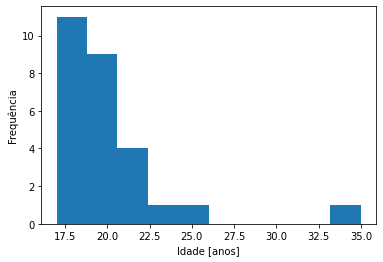

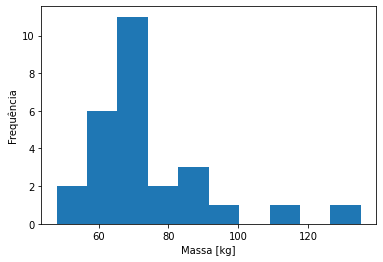

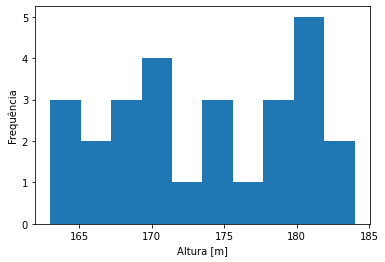

In [22]:
#Exercício 1
import matplotlib.pyplot as plt
import re

#File name
input_file = 'dados_alunos.txt'

data = {
    'id': [],
    'idade': [],
    'massa': [],
    'altura': []
}

with open(input_file, "r") as file:
    for line in file:
        #Get values in this line
        column = line.strip().split('\t')
        
        #If has information on this line
        if re.fullmatch('[\d\t]+\n*', line) is not None:
            data['id'].append(int(column[0]))
            data['idade'].append(int(column[1]))
            data['massa'].append(int(column[2]))
            data['altura'].append(int(column[3]))
    file.close()

#Plot graph
def plot_hist(x, label_x, label_y):
    plt.hist(x)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

plot_hist(data['idade'],  "Idade [anos]", "Frequência")
plot_hist(data['massa'],  "Massa [kg]",   "Frequência")
plot_hist(data['altura'], "Altura [m]",   "Frequência")

In [74]:
#Exercício 2
import os

#List every file in this directory
def search_in_dir(directory_name):
    for (dirpath, dirnames, filenames) in os.walk(directory_name):
        #dirpath is the path of current directory
        #dirnames represents all subdirectories inside current directory
        #filenames represents all files in current directory

        print("Directory name:", directory_name)

        print("\nList of subdirectories:")
        for dirname in dirnames:
            print('>', dirname)

        print("\nList of files:")
        for filename in filenames:
            print('>', filename)

        #Do not look inside subdirectories
        break
   
#Search in current directory
search_in_dir('.')

Directory name: .

List of subdirectories:
> .config
> __pycache__
> sample_data

List of files:
> dados_alunos.txt
> lcount.py


In [78]:
#Exercício 3
import lcount

print(__name__)
print(lcount.linecount('dados_alunos.txt'))

__main__
28


In [60]:
#Exercício 4

def read_file(file_path, has_header = True, convert_to_int = True):
    """
    Return a dictionary of arrays associating each column with data.
    
    Keys of this dictionary are columns if has_header == True or numbers if has_header == False
    If convert_to_int == True it converts all data to int
    """
    #Create dictionary
    dictionary = {}
    column_titles = []

    #Read every line of file
    with open(file_path, "r") as file:
        for line in file:
            columns = line.strip().split('\t')

            if not has_header:
                for number in range(len(columns)):
                    dictionary[column] = []
                    column_titles.append(number)


            if not dictionary:
                #Define dictionary keys and associate column number to key
                for column in columns:
                    dictionary[column] = []
                    column_titles.append(column)
            else:
                #Define dictionary data
                for number, column in enumerate(columns):
                    if convert_to_int:
                        dictionary[column_titles[number]].append(int(column))
                    else:
                        dictionary[column_titles[number]].append(column)
        return dictionary
        file.close()
    return False

results = read_file('dados_alunos.txt')

for result in results:
    print(result, '=', results[result])

Estudante = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Idade = [17, 22, 21, 18, 18, 22, 19, 18, 18, 20, 18, 19, 20, 19, 18, 18, 20, 25, 19, 18, 35, 17, 19, 22, 19, 23, 18]
Massa = [48, 135, 72, 80, 65, 58, 68, 55, 70, 84, 68, 71, 57, 68, 66, 110, 69, 85, 62, 80, 98, 63, 86, 74, 70, 70, 57]
Altura = [163, 179, 181, 175, 177, 166, 179, 170, 167, 180, 165, 182, 168, 170, 170, 165, 168, 180, 180, 184, 179, 175, 180, 175, 172, 170, 168]


In [8]:
#Exercício 5

%%writefile read_file.py
def read_file(file_path, has_header = True, convert_to_int = True):
    """
    Return a dictionary of arrays associating each column with data.
    
    Keys of this dictionary are columns if has_header == True or numbers if has_header == False
    If convert_to_int == True it converts all data to int
    """
    #Create dictionary
    dictionary = {}
    column_titles = []

    #Read every line of file
    with open(file_path, "r") as file:
        for line in file:
            columns = line.strip().split('\t')

            if not has_header:
                for number in range(len(columns)):
                    dictionary[column] = []
                    column_titles.append(number)


            if not dictionary:
                #Define dictionary keys and associate column number to key
                for column in columns:
                    dictionary[column] = []
                    column_titles.append(column)
            else:
                #Define dictionary data
                for number, column in enumerate(columns):
                    if convert_to_int:
                        dictionary[column_titles[number]].append(int(column))
                    else:
                        dictionary[column_titles[number]].append(column)
        return dictionary
        file.close()
    return False

Overwriting read_file.py


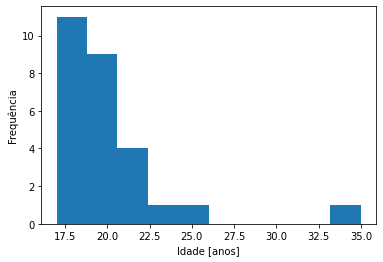

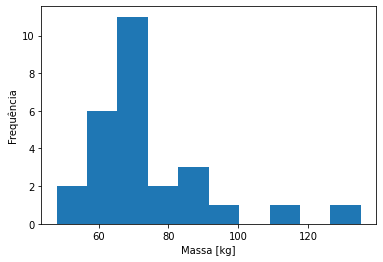

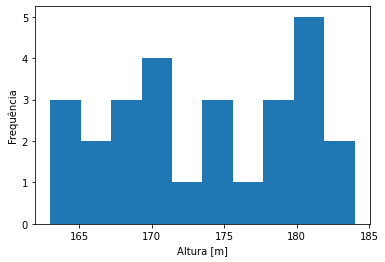

In [6]:
#Exercício 6
import read_file
import matplotlib.pyplot as plt

#Plot graph
def plot_hist(x, label_x, label_y):
    plt.hist(x)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.show()

data = read_file.read_file('dados_alunos.txt')

plot_hist(data['Idade'],  "Idade [anos]", "Frequência")
plot_hist(data['Massa'],  "Massa [kg]",   "Frequência")
plot_hist(data['Altura'], "Altura [m]",   "Frequência")

In [23]:
#Exercício 7
import read_file
import statistics
# desvio padrão amostral, desvio padrão populacional e média

data = read_file.read_file('dados_alunos.txt')

for i in data:
    print('{}:'.format(i))
    print('----------------------------')
    print('Média:                      {}'.format(statistics.mean(data[i])))
    print('Desvio padrão amostral:     {}'.format(statistics.stdev(data[i])))
    print('Desvio padrão populacional: {}'.format(statistics.pstdev(data[i])))
    print('----------------------------')


Estudante:
----------------------------
Média:                      14
Desvio padrão amostral:     7.937253933193772
Desvio padrão populacional: 7.788880963698615
----------------------------
Idade:
----------------------------
Média:                      20
Desvio padrão amostral:     3.573406045949826
Desvio padrão populacional: 3.5066075195687776
----------------------------
Massa:
----------------------------
Média:                      73.66666666666667
Desvio padrão amostral:     18.083141320025124
Desvio padrão populacional: 17.745108872274887
----------------------------
Altura:
----------------------------
Média:                      173.62962962962962
Desvio padrão amostral:     6.239749428821075
Desvio padrão populacional: 6.123108313461501
----------------------------
